In [2]:
pip install kagglehub

   ---------------------------------------- 0.0/62.7 kB ? eta -:--:--
   -------------------------- ------------- 41.0/62.7 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 62.7/62.7 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 68.8M/68.8M [00:05<00:00, 13.0MB/s]

Extracting files...


Path to dataset files: C:\Users\Msys\.cache\kagglehub\datasets\zalando-research\fashionmnist\versions\4


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# 1️. تحميل بيانات Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

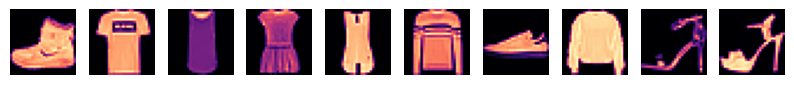

In [3]:
# 2️. عرض بعض الصور للتحقق من البيانات
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='magma')  # عرض الصورة باللون الاسود والوردي
    ax.axis("off")  # إخفاء المحاور
plt.show()

In [4]:
# 3️. تحويل الصور من شكل (28x28)
# إلى متجهات ذات 784 قيمة لكل صورة
X_train_flattened = X_train.reshape(len(X_train), -1)

In [11]:
# 4️. تقليل الأبعاد باستخدام PCA
# للحفاظ على المعلومات المهمة فقط
pca = PCA(n_components=50)  # نحدد عدد الأبعاد الجديدة بـ 50
X_train_pca = pca.fit_transform(X_train_flattened)

In [12]:
# 5️. تطبيق خوارزمية K-Means 
# لتجميع الصور في 10 مجموعات (تمثل الفئات)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train_pca)

In [13]:
# 6️. تحليل جودة التجميع عبر مقارنة المجموعات بالفئات الأصلية
# إنشاء DataFrame 
# لتوضيح العلاقة بين clusters, categories
df = pd.DataFrame({"Cluster": clusters, "True Label": y_train})

In [14]:
df

,Cluster,True Label
0,6,9
1,5,0
2,3,0
3,4,3
4,0,0
...,...,...
59995,3,5
59996,0,1
59997,5,3
59998,3,0


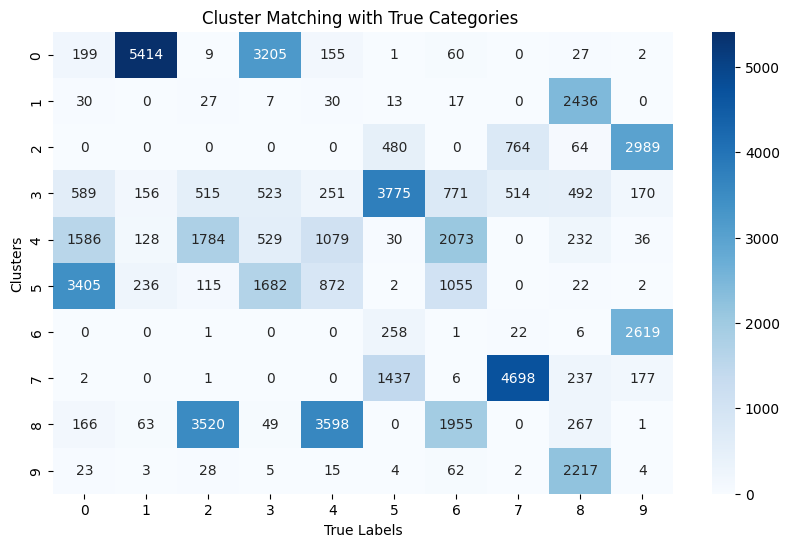

In [15]:
# Create a heatmap to show the alignment of clusters with true categories
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df["Cluster"], df["True Label"]), annot=True, fmt="d", cmap="Blues")
plt.xlabel("True Labels")
plt.ylabel("Clusters")
plt.title("Cluster Matching with True Categories ")
plt.show()

### True Labels: 
#### 0 = T-shirt/top
#### 1 = Trouser
#### 2 = Pullover
#### 3 = Dress
#### 4 = Coat
#### 5 = Sandal
#### 6 = Shirt
#### 7 = Sneaker
#### 8 = Bag
#### 9 = Ankle boot

In [33]:
# I tried to use Agglomerative Clustering 
# لم تكن جيدة لأنها ذو تطبيق هرمي يأهذ وقت طويلل جدا 